In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
covid_cases = pd.read_csv('C:/Users/user/Downloads/WHO-COVID-19-global-data.csv')

covid_cases.head(50)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
covid_cases.shape

(323268, 8)

In [4]:
covid_cases.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.232680e+05,3.232680e+05,323268.000000,3.232680e+05
mean,2.384633e+03,1.472605e+06,21.528008,1.805220e+04
std,3.920838e+04,6.720642e+06,149.018945,7.566745e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,0.000000e+00,2.411000e+03,0.000000,1.800000e+01
50%,0.000000e+00,3.595300e+04,0.000000,3.940000e+02
75%,1.590000e+02,4.154055e+05,2.000000,5.740000e+03
max,6.966046e+06,1.034368e+08,11447.000000,1.127152e+06


In [5]:
covid_cases.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [23]:
covid_cases.rename(columns={'Date_reported': 'Date'}, inplace=True)
covid_cases['Date'] = pd.to_datetime(covid_cases['Date'])
covid_cases_m = covid_cases.resample('M', on='Date')['New_cases'].sum()
covid_cases_m = covid_cases_m.reset_index()
covid_cases_m['New_cases'] = pd.to_numeric(covid_cases_m['New_cases'])
covid_cases_m['Date'] = covid_cases_m['Date'].dt.strftime('%Y-%m')

covid_cases_m.head()


,Date,New_cases
0,2020-01,9843
1,2020-02,75364
2,2020-03,697575
3,2020-04,2222860
4,2020-05,2886396


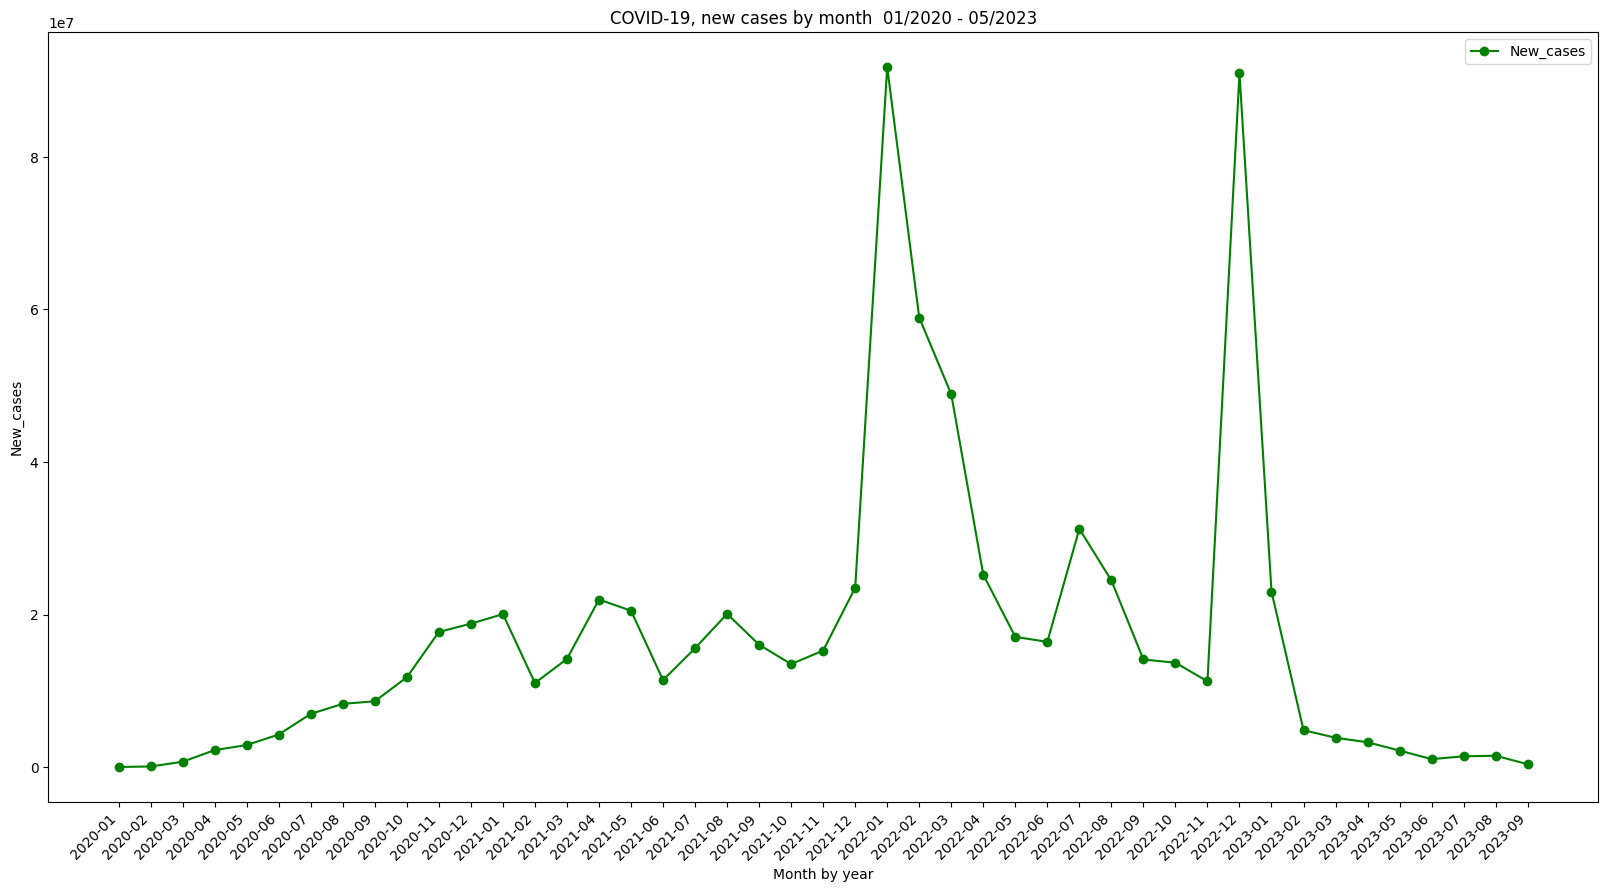

In [28]:
ax = covid_cases_m.plot(kind='line', x='Date', y='New_cases', xlabel='Month by year',  marker='o', ylabel='New_cases', color='green',
                      title='COVID-19, new cases by month  01/2020 - 09/2023')

plt.gcf().set_size_inches(20, 10)
ax.set_xticks(range(len(covid_cases_m['Date'])))
ax.set_xticklabels(covid_cases_m['Date'], rotation=45, ha='right')
plt.show()